# Sprint4課題 機械学習スクラッチロジスティック回帰

## 【問題1】ロジスティック回帰のクラスを作成する
ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

シグモイド関数
コーディング

シグモイド関数を実装しましょう。

正しく動作しているかを確認するために、この関数に-10から10の値を入力したときの出力をプロットしておいてください。

目的関数
以下の数式で表されるロジスティック回帰の目的関数Jを実装してください。この数式には正則化項が含まれています。

数式が見切れる場合、DIVERを全画面にして御覧ください

最急降下法
最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。

In [ ]:
#まずはイメージを固める

In [370]:
#特徴量X (n_samples, n_features)
#x_0: intercept, x_1: first feature, x_2: second feature)
import numpy as np
X = np.array([
    [1, 1, 2],
    [1, 3, 4],
    [1, 5, 6],
    [1, 7, 8],
    [1, 9, 10]
])
X

array([[ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  5,  6],
       [ 1,  7,  8],
       [ 1,  9, 10]])

In [371]:
#目的変数y(n_samples)
y = np.array([0, 1, 1, 0, 1]).reshape(-1, 1)
y

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [372]:
#Xの係数theta(n_features)
theta = np.empty((0,3))
theta = np.append(theta, np.array([[0,0,0]]), axis=0)
theta

array([[0., 0., 0.]])

In [373]:
#sigmoid function

def convert_sigmoid(z):
    """
    Parameters
    -----------
    z: ndarray of shape(any, any)
    
    Returns
    -----------
    sigmoid_z: ndarray of shape z
        sigmoid_z = 1/(1 + exp(-z))
    
    Note
    -----------
    """
    sigmoid_z = 1/(1 +np.exp(-z))
    
    
    return sigmoid_z

In [374]:
#シグモイドの確認
convert_sigmoid(y)

array([[0.5       ],
       [0.73105858],
       [0.73105858],
       [0.5       ],
       [0.73105858]])

In [375]:
test = np.arange(-10, 10, 0.1)
test.shape

(200,)

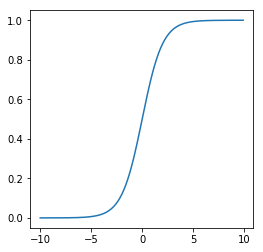

In [376]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(test, convert_sigmoid(test), '-')

In [377]:
#Hypothesis function
#thetaとxから求めたyの予測値
h = convert_sigmoid(np.dot(X, theta.reshape(-1, 1)))
h

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [378]:
#Cost functionを順を追って計算
#np.logの確認
np.log(h)

array([[-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718]])

In [379]:
# y = 1の時に h ≒ 0と予測するとコスト無限大になり、h ≒ 1と予測するとコスト最小となる項
-y*np.log(h)

array([[-0.        ],
       [ 0.69314718],
       [ 0.69314718],
       [-0.        ],
       [ 0.69314718]])

In [380]:
# y = 0の時に h ≒ 1と予測するとコスト無限大になり、h ≒ 0と予測するとコスト最小となる項
(1-y)*np.log(1-h)

array([[-0.69314718],
       [-0.        ],
       [-0.        ],
       [-0.69314718],
       [-0.        ]])

In [381]:
#正則化項の確認

lmd = 1
lmd*(theta[:, 1:]**2).sum(axis=1)

array([0.])

In [382]:
#Cost関数Jの確認
J = (-y*np.log(h) -(1-y)*np.log(1-h)).sum(axis=0)/len(X) + lmd*(theta[:, 1:]**2).sum(axis=1)/len(X)
J

array([0.69314718])

In [383]:
#sumの計算を内積にする
#出力が一致したのでOK
J = (-np.dot(y.T, np.log(h)) -np.dot((1-y).T, np.log(1-h)))/len(X) + lmd*np.dot(theta[:,1:], theta[:, 1:].T)/len(X)
J

array([[0.69314718]])

In [ ]:
#イメージできたのでクラスを作る

In [697]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLogisticRegression():
    """
    Logistic回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr: float
        学習率learning rate
    lmbd: float
        正則化パラメータ lambda
    no_bias : bool
        バイアス項を入れない場合はTrue
    unique_value: ndarray of unique element in y
        yの要素を重複なしで抜き出したndarray（yの値を0, 1に変換するために利用）
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, lmbd, bias=1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.lmbd = lmbd
        self.bias = bias
        self.unique_value = []
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        #XにX_0の列をbias埋めで追加（切片の項を追加）
        X = np.concatenate((np.full((len(X), 1), self.bias), X), axis=1)
                
        # yのshapeを(n_samples, )から(n_samples, 1)にする
        y = y.reshape(-1,1)
        
        #0, 1以外の２値で入力された場合への対応（例：a, bを0, 1に変換）
        #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
        self.unique_value = np.unique(y_train)
        #yを0, 1に変換（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
        y = (y != self.unique_value[0]).astype(np.int64)
        
        #validation dataに対して同様の前処理
        if not ((X_val is None) or (y_val is None)):
            X_val = np.concatenate((np.full((len(X_val), 1), self.bias), X_val), axis=1)
            y_val = y_val.reshape(-1,1)
            y_val = (y_val != self.unique_value[0]).astype(np.int64)
            
        #coef_ (theta)を初期化 (1, n_features)
        #-1 ~ 1の乱数で
        a = -1
        b = 1
        self.coef_ = (b - a) * np.random.rand(X.shape[1]).reshape(1,-1)  + a     
        
        #self.iterの回数だけself.coef_を更新しながらhも更新していく
        for i in range(self.iter):
            #予測値h
            h = self._hypothesis(X)
            
            #hを元にしてCostの計算
            mse, error = self._cost(h, y)
            
            #costをval_lossに記録
            self.loss[i] = mse
            
            #validation dataに対して同様の処理
            if not ((X_val is None) or (y_val is None)):
                h_val = self._hypothesis(X_val)
                J_val, error_val = self._cost(h_val, y_val)
                self.val_loss[i] = J_val
                
            #errorを元にgradを計算してself.coef_を更新
            self._gradient_descent(X, error)
    
    def predict_proba(self, X_test):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #XにX_0の列を追加（切片の項を追加）
        X_test = np.concatenate((np.full((len(X_test), 1), self.bias), X_test), axis=1)

        #a.dot(b)よりもnp.dot(a, b)の方が早い(np.dotはC言語、a.dotはPythonでの処理なので)
        prob = self._convert_sigmoid(np.dot(X_test, (self.coef_).T))
        return prob
    
    def predict(self, X_test):
        prob = (self.predict_proba(X_test) >= 0.5).astype(np.int64)
        prob = prob[:, 0]
        pred = self.unique_value[prob]
        return pred

    def _convert_sigmoid(self, z):
        """
        Parameters
        -----------
        z: ndarray of shape(any, any)

        Returns
        -----------
        sigmoid_z: ndarray of shape z
            sigmoid_z = 1/(1 + exp(-z))

        Note
        -----------
        """
        sigmoid_z = 1/(1 +np.exp(-z))
        return sigmoid_z
    
    def _hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
          学習データ

        Returns
        -------
          ndarray of shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = self._convert_sigmoid(np.dot(X, (self.coef_).T))
        
        return h
      
    def _cost(self, h, y):
        """
        costの計算

        Parameters
        ----------
        h : ndarray of shape (n_samples,)
          推定した値
        y : ndarray of shape (n_samples,)
          正解値

        Returns
        ----------
        J : np.float
        """
        
        #コストのメイン部分
        #(1/m) * sigma(-y*log(h(x)) - (1-y)*log(1-h(x)))
        J = (-np.dot(y.T, np.log(h)) -np.dot((1-y).T, np.log(1-h)))/len(X)
        
        #正則化項
        #(lambda/m)* sigma(theta^2)
        #theta = 0は除外して足し合わせる
        reg_term =  self.lmbd*np.dot(self.coef_, self.coef_.T)/len(X)
        
        #コスト（メイン + 正則化項）
        J = J + reg_term
        
        #誤差(Jの勾配の計算用に)
        error = h - y
        
        return J, error

    def _gradient_descent(self, X, error):
        """
        Parameters
        ----------
        X: ndarray of shape (n_samples, n_features)
          学習データ

        error: y_pred - y
           予測値と実際のyの差
        Returns
        ----------
        インスタンス変数のtheta (self.coef_)を更新

        """
        #grad = (error * X).sum(axis=0)/len(X)
        #上の計算と同義。早い方で
        
        #theta = 0の場合
        grad_0 = np.dot(error.T, X[:, 0])/len(X)
        self.coef_[:, 0] =  self.coef_[:, 0] - self.lr * grad_0
        
        #theta = 1の場合
        grad_j =  np.dot(error.T, X[:, 1:])/len(X) - self.lmbd*self.coef_[:, 1:]/len(X)
        self.coef_[:, 1:] =  self.coef_[:, 1:] - self.lr * grad_j

    #学習曲線Plot用の関数
    def plot_learning_curve(self):
        fig, ax = plt.subplots(1,1, figsize=(4,4 ))
        ax.plot(np.array(range(self.iter)), self.loss, "-", label = 'train')
        ax.plot(np.array(range(self.iter)), self.val_loss, "-", label = 'validation')

        #label
        ax.set_title('Learning Curve')
        ax.set_xlabel('n of iterations')
        ax.set_ylabel('Cost')
        ax.legend()
    
    #学習過程を表示
    def return_process(self):
        #学習曲線
        self.plot_learning_curve()
        return self.loss, self.val_loss

In [699]:
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset.keys())
print(dataset.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [700]:
import pandas as pd

#import features
x = pd.DataFrame(dataset.data, columns = dataset.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [701]:
#import target value
y = pd.DataFrame(dataset.target, columns = {'species'})
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [702]:
#concatenate x and y
df = pd.concat((x, y), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [703]:
#extract only sepal_length and petal_length

#drop sepal width and petal width columns
df = df.drop([dataset.feature_names[1], dataset.feature_names[3]], axis=1)

#extract only versicolor and virginica
#drop setosa rows(label: 0)
setosa_row = df[df['species'] == 0].index
df = df.drop(setosa_row, axis=0)

In [704]:
#dropできた
df.tail()

,sepal length (cm),petal length (cm),species
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2
149,5.9,5.1,2


In [705]:
#Splitして標準化する
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'species'].values, df.loc[:, df.columns == 'species'].values, train_size=3/4, test_size=1/4)

#standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

In [706]:
#スクラッチした線形回帰クラスのインスタンスを生成
reg = ScratchLogisticRegression(num_iter=500, lr=0.01, lmbd = 1,  bias=1)

In [707]:
#fit with train data
reg.fit(X_train_z, y_train, X_test_z, y_test)
#reg.fit(X_train_z, y_train)

In [708]:
#predict test data
scrach_pred = reg.predict(X_test_z)
scrach_pred

array([2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2])

In [709]:
y_test.reshape(1, -1)

array([[2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
        1, 1, 2]])

In [710]:
scrach_pred ==y_test.reshape(1, -1)

array([[ True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True]])

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

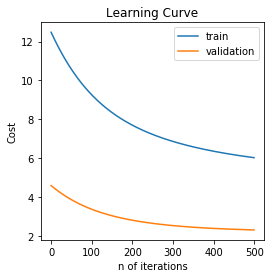

In [711]:
reg.return_process();

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

In [712]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',  target_names=['versicolor', 'virginica']):
    """
    ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
    背景の色が学習したモデルによる推定値から描画される
    散布図の点は学習用のデータである。
    
    Parameters
    ---------------
    X_train: ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train: ndarray, shape(n_samples,)
        学習用データの正解値
    model: object
        学習したモデルのインスタンスを入れる
    step: float, (default: 0.1)
        推定値を計算する間隔を設定する
    title: str
        グラフのタイトルの文章を与える
    xlabel, ylabel: str
        軸ラベルの文章を与える
    target_names=: list of str
        凡例の一覧を与える
    ---------------
    """
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink','skyblue']
    n_class = 2
    
    #pred
    #各特徴量に対してメッシュを生成（a=(a1, a2, a3), b=(b1, b2, b3)に対して[[a1, b1], [a1, b2], [a1, b3]], [[a2, b1], [a2, b2], [a2, b3]], [[a3, b1], [a3, b2], [a3, b3]]を生成）
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    
    #多次元を一次元配列に
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #等高線塗りつぶし
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    #等高線塗りつぶし
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha = 0.5)
    #重複しない要素に対して, 答えをプロット
    for i, target in enumerate(set(np.unique(y_train))):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show

In [713]:
X_train_z.shape

(75, 2)

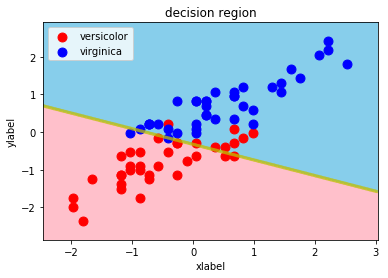

In [714]:
#trainデータの学習結果
decision_region(X_train_z, y_train[:,0], reg)

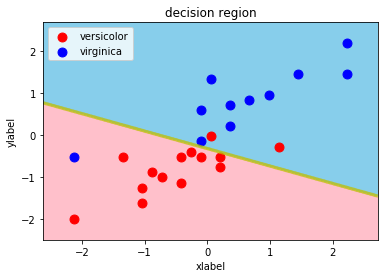

In [715]:
#testデータの評価結果
decision_region(X_test_z, y_test[:,0], reg)

## 【問題5】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやnumpy.savezを利用します。

pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント

numpy.savez — NumPy v1.15 Manual

## 【問題6】分類と回帰
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

分類問題と回帰問題は本質的に何が異なっているか
注意点

答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。